In [25]:
import qiskit as q
%matplotlib inline

## Summing 3 qubits (a, b and c) using a quantum circuit

Initilizing the values of a, b and c.
These should be either 0 or 1

We have chosen to perform 1+0+1

In [44]:
a = 1
b = 0
c = 1

Defining the quantum circuit on qiskit

In [45]:
#Initilizing the circuit
circuit = q.QuantumCircuit(5,2)

#Initilizing the qubits
if a==1:
    circuit.x(0)
if b==1:
    circuit.x(1)  
if c==1:
    circuit.x(2)
    
#Implementing Controlled Not gates    
circuit.cx(0,3)
circuit.cx(1,3)
circuit.cx(2,3)
circuit.ccx(0,1,4)
circuit.ccx(0,2,4)
circuit.ccx(1,2,4)

#Mapping the qubits to conventional bits
circuit.measure(3,0)
circuit.measure(4,1)

print(circuit)

     ┌───┐                                    
q_0: ┤ X ├──■──────────────■────■─────────────
     └───┘  │              │    │             
q_1: ───────┼────■─────────■────┼───────■─────
     ┌───┐  │    │         │    │       │     
q_2: ┤ X ├──┼────┼────■────┼────■───────■─────
     └───┘┌─┴─┐┌─┴─┐┌─┴─┐  │    │  ┌─┐  │     
q_3: ─────┤ X ├┤ X ├┤ X ├──┼────┼──┤M├──┼─────
          └───┘└───┘└───┘┌─┴─┐┌─┴─┐└╥┘┌─┴─┐┌─┐
q_4: ────────────────────┤ X ├┤ X ├─╫─┤ X ├┤M├
                         └───┘└───┘ ║ └───┘└╥┘
c_0: ═══════════════════════════════╩═══════╬═
                                            ║ 
c_1: ═══════════════════════════════════════╩═
                                              


Simulating the circuit on local machine

In [46]:
from qiskit.tools.monitor import job_monitor
from qiskit import Aer

backend = Aer.get_backend("qasm_simulator")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


Plotting the results, real quantum computers have noise, however since we are simulating an ideal quantum computer all the 500 iterations have the same output

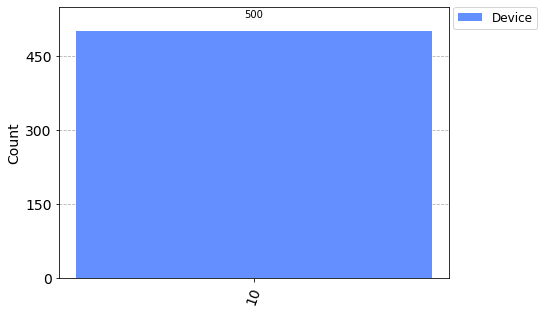

In [47]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

In [48]:
for i in counts:
    num0=int(i[1])
    num1=int(i[0])
    sum = num0+2*num1
    print('The obtained sum is: '+str(sum))

The obtained sum is: 2


## Simultaenously performing 2 addtion operations on 3 qubits

We will simultaneously perform 1+1+1 and 0+1+1

In [49]:
b=1
c=1

Defining the quantum circuit on qiskit


In [32]:
#Initilizing the circuit
circuit = q.QuantumCircuit(5,2)

#Initilizing the qubits
circuit.h(0)
if b==1:
    circuit.x(1)   
if c==1:
    circuit.x(2)
    
#Implementing Controlled Not gates    
circuit.cx(0,3)
circuit.cx(1,3)
circuit.cx(2,3)
circuit.ccx(0,1,4)
circuit.ccx(0,2,4)
circuit.ccx(1,2,4)

#Mapping the qubits to conventional bits
circuit.measure(3,0)
circuit.measure(4,1)

print(circuit)

     ┌───┐                                    
q_0: ┤ H ├──■──────────────■────■─────────────
     ├───┤  │              │    │             
q_1: ┤ X ├──┼────■─────────■────┼───────■─────
     ├───┤  │    │         │    │       │     
q_2: ┤ X ├──┼────┼────■────┼────■───────■─────
     └───┘┌─┴─┐┌─┴─┐┌─┴─┐  │    │  ┌─┐  │     
q_3: ─────┤ X ├┤ X ├┤ X ├──┼────┼──┤M├──┼─────
          └───┘└───┘└───┘┌─┴─┐┌─┴─┐└╥┘┌─┴─┐┌─┐
q_4: ────────────────────┤ X ├┤ X ├─╫─┤ X ├┤M├
                         └───┘└───┘ ║ └───┘└╥┘
c_0: ═══════════════════════════════╩═══════╬═
                                            ║ 
c_1: ═══════════════════════════════════════╩═
                                              


Simulating the circuit on local machine

In [33]:
from qiskit.tools.monitor import job_monitor
from qiskit import Aer

backend = Aer.get_backend('qasm_simulator')
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


Plotting the results (histogram)

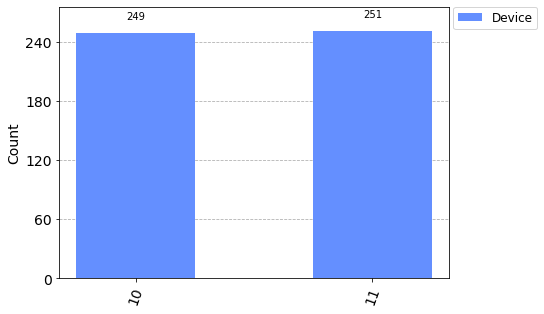

In [34]:
from qiskit.visualization import plot_histogram

result = job.result()
counts2 = result.get_counts(circuit)

plot_histogram([counts2], legend=['Device'])

In [38]:
print('The obtained sums are-')
for i in counts2:
    num0=int(i[1])
    num1=int(i[0])
    sum = num0+2*num1
    print(sum)

The obtained sums are-
2
3


## Running a quantum circuit on a real quantum computer

In [10]:
a = 1
b = 0
c = 1

In [3]:
circuit = q.QuantumCircuit(5,2)

if a==1:
    circuit.x(0)

if b==1:
    circuit.x(1)
    
if c==1:
    circuit.x(2)
    
    
circuit.cx(0,3)
circuit.cx(1,3)
circuit.cx(2,3)
circuit.ccx(0,1,4)
circuit.ccx(0,2,4)
circuit.ccx(1,2,4)

circuit.measure(3,0)
circuit.measure(4,1)
print(circuit)

     ┌───┐                                    
q_0: ┤ X ├──■──────────────■────■─────────────
     └───┘  │              │    │             
q_1: ───────┼────■─────────■────┼───────■─────
     ┌───┐  │    │         │    │       │     
q_2: ┤ X ├──┼────┼────■────┼────■───────■─────
     └───┘┌─┴─┐┌─┴─┐┌─┴─┐  │    │  ┌─┐  │     
q_3: ─────┤ X ├┤ X ├┤ X ├──┼────┼──┤M├──┼─────
          └───┘└───┘└───┘┌─┴─┐┌─┴─┐└╥┘┌─┴─┐┌─┐
q_4: ────────────────────┤ X ├┤ X ├─╫─┤ X ├┤M├
                         └───┘└───┘ ║ └───┘└╥┘
c_0: ═══════════════════════════════╩═══════╬═
                                            ║ 
c_1: ═══════════════════════════════════════╩═
                                              


In [4]:
from qiskit.tools.monitor import job_monitor
from qiskit import Aer

from qiskit import IBMQ
IBMQ.save_account('f7d70985f40116f6a55e93ab31d29333586c73233754e25c808e8ef1557b5eb0ac02e2d349ac58f9eb6fed23f42d7b19e63afe8f035eccd99d8c256d75d94622')

IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

backend = provider.get_backend("ibmq_manila")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

configrc.store_credentials:WARNING:2022-11-04 17:03:20,099: Credentials already present. Set overwrite=True to overwrite.


Job Status: job has successfully run


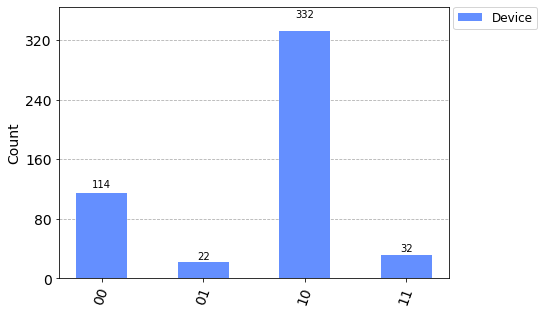

In [5]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

As we can see the obtained output is 10 (in binary), which is 2 when converted to decimal.
Our results are noisy due to imperfections in real quantum computers.